In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import requests
import datetime
import random
#from api_key import api_key

In [2]:
csv_read = pd.read_csv("../cleaned_2018_texas_accidents.csv")
texas_accidents_df = pd.DataFrame(csv_read)
texas_accidents_df.head()

,Unnamed: 0,Time,Latitude,Longitude,City,County,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Year,Month,Day
0,195997,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,66.9,90.0,29.79,8.0,4.6,0.0,Overcast,2018,11,30
1,195998,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
2,196000,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,64.9,97.0,29.79,3.0,6.9,0.0,Overcast,2018,11,30
3,196019,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30
4,196021,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,68.0,87.0,29.79,10.0,8.1,0.0,Light Drizzle,2018,11,30


In [3]:
#texas_accidents_df["Time"] = pd.to_datetime(texas_accidents_df ["Time"])
#texas_accidents_df = pd.read_csv("cleaned_2018_texas_accidents.csv")
print(texas_accidents_df )

      Unnamed: 0                 Time   Latitude  Longitude         City  \
0         195997  2018-11-30 04:04:00  29.354069 -98.400734  San Antonio   
1         195998  2018-11-30 04:03:22  29.452906 -98.501022  San Antonio   
2         196000  2018-11-30 04:03:04  29.483614 -98.403198  San Antonio   
3         196019  2018-11-30 11:03:46  29.494801 -98.535782  San Antonio   
4         196021  2018-11-30 11:15:14  29.493256 -98.499268  San Antonio   
...          ...                  ...        ...        ...          ...   
7017      368379  2018-01-26 18:16:04  32.980930 -97.306380   Fort Worth   
7018      368381  2018-01-26 19:07:03  33.020830 -97.278360      Roanoke   
7019      368384  2018-01-26 19:39:16  32.860870 -96.892430       Dallas   
7020      368386  2018-01-27 01:42:16  29.951590 -95.417620      Houston   
7021      368388  2018-01-27 03:26:32  32.771006 -96.813618       Dallas   

       County State     Zipcode  Temperature(F)  Humidity(%)  Pressure(in)  \
0       B

In [4]:
sa_df = texas_accidents_df.loc[texas_accidents_df['City'] == 'San Antonio']
sa_df = sa_df [["Time", "Latitude", "Longitude", "City", "County", "State", "Zipcode", "Month", "Day"]]
sa_df['Time']= pd.to_datetime(sa_df['Time'])
sa_df

,Time,Latitude,Longitude,City,County,State,Zipcode,Month,Day
0,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,11,30
1,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,11,30
2,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,11,30
3,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,11,30
4,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,11,30
...,...,...,...,...,...,...,...,...,...
6937,2018-02-21 17:17:03,29.514950,-98.553270,San Antonio,Bexar,TX,78230,2,21
6988,2018-01-10 06:13:06,29.509690,-98.540040,San Antonio,Bexar,TX,78230-5136,1,10
6998,2018-01-16 08:25:53,29.439430,-98.444350,San Antonio,Bexar,TX,78208,1,16
7002,2018-01-16 13:35:36,29.393170,-98.511350,San Antonio,Bexar,TX,78204,1,16


In [5]:
#t = datetime.strptime('9:33:07','%H:%M:%S')
#print(t.hour)
sa_df.loc[:, "Time"]

0      2018-11-30 04:04:00
1      2018-11-30 04:03:22
2      2018-11-30 04:03:04
3      2018-11-30 11:03:46
4      2018-11-30 11:15:14
               ...        
6937   2018-02-21 17:17:03
6988   2018-01-10 06:13:06
6998   2018-01-16 08:25:53
7002   2018-01-16 13:35:36
7015   2018-01-26 12:28:48
Name: Time, Length: 854, dtype: datetime64[ns]

In [6]:
#define bins as 0 to 5, 6 to 11, 12 to 17, 18 to 24, 24
bins = [0, 6, 12, 18, 24]

In [7]:
#names for the bins
group_names = ["Graveyard", "Morning", "Mid Day", "Evening"]

In [8]:
sa_df["Time of Day in Shifts"] = pd.cut(sa_df["Time"].dt.hour, bins, labels=group_names, include_lowest=True)
sa_df

,Time,Latitude,Longitude,City,County,State,Zipcode,Month,Day,Time of Day in Shifts
0,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,11,30,Graveyard
1,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,11,30,Graveyard
2,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,11,30,Graveyard
3,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,11,30,Morning
4,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,11,30,Morning
...,...,...,...,...,...,...,...,...,...,...
6937,2018-02-21 17:17:03,29.514950,-98.553270,San Antonio,Bexar,TX,78230,2,21,Mid Day
6988,2018-01-10 06:13:06,29.509690,-98.540040,San Antonio,Bexar,TX,78230-5136,1,10,Graveyard
6998,2018-01-16 08:25:53,29.439430,-98.444350,San Antonio,Bexar,TX,78208,1,16,Morning
7002,2018-01-16 13:35:36,29.393170,-98.511350,San Antonio,Bexar,TX,78204,1,16,Mid Day


In [9]:
sa_df["Time of Day in Shifts"].value_counts()

Morning      441
Mid Day      215
Graveyard    144
Evening       54
Name: Time of Day in Shifts, dtype: int64

In [10]:
most_times = sa_df["Time of Day in Shifts"].value_counts()
most_times
#group_names = ["Morning", "Mid Day", "Graveyard", "Evening"]

Morning      441
Mid Day      215
Graveyard    144
Evening       54
Name: Time of Day in Shifts, dtype: int64

In [11]:
grouped_by_month = sa_df.groupby("Month")
month_counts = grouped_by_month.count()
month_counts["Time"]

Month
1      49
2     146
3      17
4      14
5      47
6      40
7      80
8      11
9     134
10    153
11    110
12     53
Name: Time, dtype: int64

In [12]:
#define bins as 1 to 8, 9 to 16, 17 to 24, 25 to 31
bins = [1, 8, 16, 24, 31]

In [13]:
#names for the bins
group_names = ["QTR1", "QTR2", "QTR3", "QTR4"]

In [14]:
sa_df["Day of Month"] = pd.cut(sa_df["Day"], bins, labels=group_names, include_lowest=True)
sa_df

,Time,Latitude,Longitude,City,County,State,Zipcode,Month,Day,Time of Day in Shifts,Day of Month
0,2018-11-30 04:04:00,29.354069,-98.400734,San Antonio,Bexar,TX,78222,11,30,Graveyard,QTR4
1,2018-11-30 04:03:22,29.452906,-98.501022,San Antonio,Bexar,TX,78212-3329,11,30,Graveyard,QTR4
2,2018-11-30 04:03:04,29.483614,-98.403198,San Antonio,Bexar,TX,78218,11,30,Graveyard,QTR4
3,2018-11-30 11:03:46,29.494801,-98.535782,San Antonio,Bexar,TX,78213-3947,11,30,Morning,QTR4
4,2018-11-30 11:15:14,29.493256,-98.499268,San Antonio,Bexar,TX,78216-7205,11,30,Morning,QTR4
...,...,...,...,...,...,...,...,...,...,...,...
6937,2018-02-21 17:17:03,29.514950,-98.553270,San Antonio,Bexar,TX,78230,2,21,Mid Day,QTR3
6988,2018-01-10 06:13:06,29.509690,-98.540040,San Antonio,Bexar,TX,78230-5136,1,10,Graveyard,QTR2
6998,2018-01-16 08:25:53,29.439430,-98.444350,San Antonio,Bexar,TX,78208,1,16,Morning,QTR2
7002,2018-01-16 13:35:36,29.393170,-98.511350,San Antonio,Bexar,TX,78204,1,16,Mid Day,QTR2


In [15]:
grouped_by_day_of_month = sa_df.groupby("Day of Month")
day_counts = grouped_by_day_of_month.count()
day_counts["Time"]

Day of Month
QTR1    229
QTR2    307
QTR3    229
QTR4     89
Name: Time, dtype: int64

In [16]:
most_qtr = day_counts["Time"]
most_qtr

Day of Month
QTR1    229
QTR2    307
QTR3    229
QTR4     89
Name: Time, dtype: int64

In [17]:
sa_df.count()

Time                     854
Latitude                 854
Longitude                854
City                     854
County                   854
State                    854
Zipcode                  854
Month                    854
Day                      854
Time of Day in Shifts    854
Day of Month             854
dtype: int64

In [18]:
sa_counts = sa_df["Time"].value_counts()
sa_counts.head()

2018-05-04 17:43:29    3
2018-10-19 06:20:13    3
2018-12-07 05:48:14    2
2018-07-09 06:07:41    2
2018-10-31 18:57:38    2
Name: Time, dtype: int64

In [24]:
sa_df = texas_accidents_df.loc[texas_accidents_df['City']=='San Antonio']
sa_time1 = sa_df.groupby('Time')
sa_time = sa_time1['Time'].count()
sa_time

Time
2018-01-10 06:09:26    1
2018-01-10 06:13:06    1
2018-01-10 06:14:28    1
2018-01-16 06:28:10    1
2018-01-16 06:28:55    1
                      ..
2018-12-19 07:28:13    1
2018-12-19 07:28:38    1
2018-12-19 07:51:42    1
2018-12-26 11:01:24    1
2018-12-26 13:19:09    1
Name: Time, Length: 842, dtype: int64

In [25]:
x_axis = sa_time.index.to_list
x_axis

<bound method IndexOpsMixin.tolist of Index(['2018-01-10 06:09:26', '2018-01-10 06:13:06', '2018-01-10 06:14:28',
       '2018-01-16 06:28:10', '2018-01-16 06:28:55', '2018-01-16 06:42:31',
       '2018-01-16 07:13:24', '2018-01-16 07:26:45', '2018-01-16 08:03:20',
       '2018-01-16 08:10:30',
       ...
       '2018-12-19 05:21:51', '2018-12-19 06:02:09', '2018-12-19 06:09:13',
       '2018-12-19 06:18:01', '2018-12-19 06:22:34', '2018-12-19 07:28:13',
       '2018-12-19 07:28:38', '2018-12-19 07:51:42', '2018-12-26 11:01:24',
       '2018-12-26 13:19:09'],
      dtype='object', name='Time', length=842)>

<font size="5">Which time of day did the most accidents occur in San Antonio in 2018?</font>

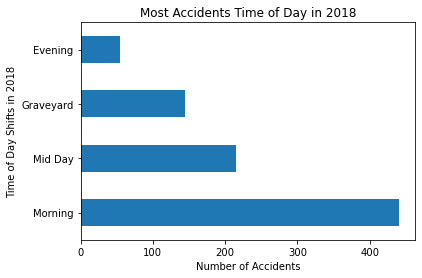

In [31]:
most_times.index.name = 'Time of Day Shifts in 2018'
most_times.plot.barh(x=x_axis, title="Most Accidents Time of Day in 2018")
plt.xlabel("Number of Accidents")
#save chart
plt.savefig("Images/times of day.png") 

<font size="5">In which quarter did the most accidents occur per quarter in 2018?</font>

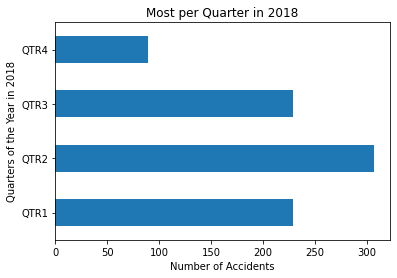

In [32]:
most_qtr.index.name = 'Quarters of the Year in 2018'
most_qtr.plot.barh(x=x_axis, title="Most per Quarter in 2018")
plt.xlabel("Number of Accidents")
#save chart
plt.savefig("Images/number of accidents.png")